In [15]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,5)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams["axes.grid"] = True

In [16]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.6'

In [17]:
from scipy.signal import argrelextrema
import pandas as pd

## 1. 차트의 상대극한 값을 모두 구한다.
### - argrelextrema 함수
## 2. 상대극한 값 주변의 window range의 최대, 최소 값을 구한다.
## 3. 구한 최대, 최소 값 주변의 window range 내에서도 같은 최대, 최소 값이 나오는지 확인
### - 계속 상승 or 하강 그래프 확인

In [22]:
#데이터프레임, 인덱스번호, 왼쪽윈도우범위, 오른쪽윈도우범위, 고점 or 저점, 저장할 리스트
def search_point(df, i, left_window_range, right_window_range, mmtype, price_list):
    if(mmtype == 1):
        max_index = df.iloc[i - left_window_range:i+right_window_range]['Close'].idxmax()
        max_len = len(df.loc[:max_index,:])
        if(max_len < left_window_range):
            left_window_range = max_len
        if(df.iloc[max_len - left_window_range:max_len+right_window_range]['Close'].idxmax() == max_index):
            price_list.append(max_index)
        return 1
    
    elif(mmtype == -1):
        min_index = df.iloc[i - left_window_range:i+right_window_range]['Close'].idxmin()
        min_len = len(df.loc[:min_index,:])
        if(min_len < left_window_range):
            left_window_range = min_len
        if(df.iloc[min_len-left_window_range:min_len+right_window_range]['Close'].idxmin() == min_index):
            price_list.append(min_index)
        return -1

In [23]:
def make_label(code, startdate, enddate, ws, y_margin, x_margin):
    df = fdr.DataReader(code, startdate, enddate)
    df['sig'] = 0
    smooth_prices = df['Close'].rolling(window=ws, min_periods=1).mean()
    local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    local_min = argrelextrema(smooth_prices.values, np.less)[0]
    
    price_local_max_dt = []
    for i in local_max:
        if (i<ws):
            search_point(df, i, i, ws, 1, price_local_max_dt)
        elif (i>=ws) and (i<len(df)):
            search_point(df, i, ws, ws, 1, price_local_max_dt)
    price_local_min_dt = []
    for i in local_min:
        if (i<ws):
            search_point(df, i, i, ws, -1, price_local_min_dt)
        elif (i>=ws) and (i<len(df)):
            search_point(df, i, ws, ws, -1, price_local_min_dt)
            
    df.loc[price_local_max_dt, 'sig'] = 1
    df.loc[price_local_min_dt, 'sig'] = -1
    
    maxima = df.loc[price_local_max_dt]
    minima = df.loc[price_local_min_dt]
    df['Close'].plot()
    plt.scatter(maxima.index, df.loc[maxima.index,'Close'])
    plt.scatter(minima.index, df.loc[minima.index,'Close'])
    
    return df, maxima, minima

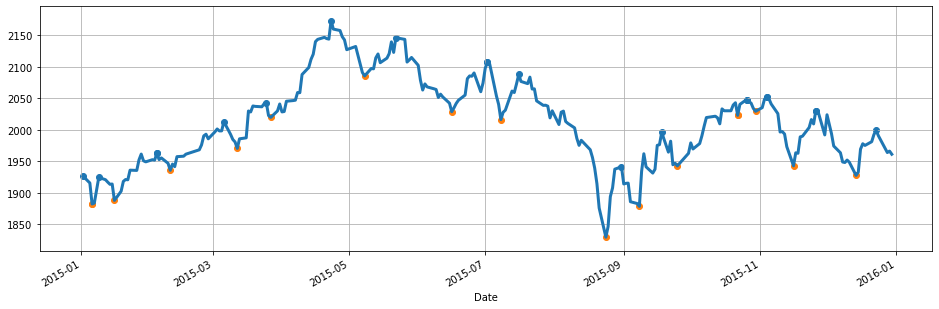

In [24]:
df, df_max, df_min = make_label("KS11", "2015-01-01", "2015-12-31", 5, 0.01, 0.05)

In [258]:
maxmin = pd.concat([df_max, df_min]).sort_index()

In [265]:
maxmin_dup = maxmin.reset_index().drop_duplicates(subset='Date', keep='first').set_index('Date')

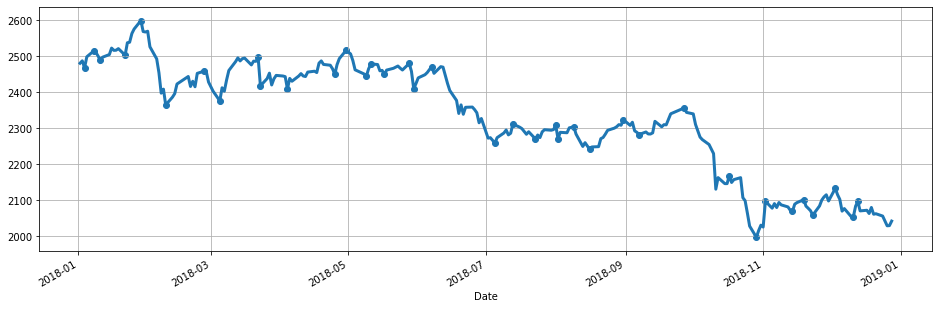

In [266]:
df['Close'].plot()
plt.scatter(maxmin_dup.index, df.loc[maxmin_dup.index,'Close'])

In [269]:
past_sig = maxmin_dup['sig'][0].index
for i in range(len(maxmin_dup)):
    if(maxmin_dup['sig'][i] == past_sig):
        if(past_sig == 1):
            max(maxmiin_dup)

In [278]:
maxmin_dup['sig'][0]

-1

# 연습

In [220]:
df = fdr.DataReader('KS11','2018-01-01','2018-12-31')
smooth_prices = df['Close'].rolling(window=5, min_periods=1).mean()
local_max = argrelextrema(smooth_prices.values, np.greater)[0]
local_min = argrelextrema(smooth_prices.values, np.less)[0]

In [225]:
local_max.

array([  1,   7,  13,  22,  38,  50,  54,  61,  64,  77,  83,  91,  98,
       108, 117, 133, 143, 147, 149, 166, 182, 193, 195, 208, 210, 217,
       226, 233, 236], dtype=int64)

In [222]:
local_min

array([  2,   9,  14,  30,  43,  53,  59,  63,  66,  79,  88,  94, 104,
       116, 125, 138, 146, 148, 155, 173, 192, 194, 203, 209, 213, 220,
       232, 234], dtype=int64)